In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

# Load data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset/telecom.csv")

# Data Jar

## 1 Data Cleaning

### 1.1 Data Structure

In [4]:
# Look at top 5 records
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,88,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
# look at bottom 5 records
df.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


In [6]:
# check its shape
df.shape

(5986, 22)

```
There are 5986 rows and 22 columns
```

In [7]:
len(df['Unnamed: 0'].unique()) , len(df['customerID'].unique())

(5986, 5986)

```
There are 5986 rows are unique so there is no use of this columns we can remove it
```

In [8]:
# Dropping Unnamed and customerID column
df.drop(['Unnamed: 0', 'customerID'],axis=1,inplace = True)

In [9]:
df.shape

(5986, 20)

### 1.2 Duplicate data

In [10]:
df.duplicated().sum()

16

```
There are 16 rows are duplicated so there is no use of duplicate values we can remove it
```

In [11]:
#dropping duplicate values
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

### 1.3 Data type

In [13]:
# Check for data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

```
Total charges is having wrong data type
```

In [14]:
# converting string into numeric value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [15]:
df['TotalCharges'].dtypes

dtype('float64')

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5970.000000,5970.000000,5970.000000,5960.000000
mean,0.161642,32.555779,64.871926,2304.125772
std,0.368152,24.500149,30.102688,2274.158543
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,412.012500
50%,0.000000,29.000000,70.450000,1416.025000
75%,0.000000,56.000000,89.937500,3852.775000
max,1.000000,88.000000,118.750000,8684.800000


### 1.4 Missing value

In [19]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

```
Total Charges having 10 null values we can drop it
```

In [20]:
df[df['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


```
All the customers are new customers so there is no totalcharges no use of this data we can drop this rows
```

In [21]:
# dropping null values
df.dropna(how ='any', inplace = True)

In [22]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 1.5 Outliers

In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.161913,32.610403,64.916636,2304.125772
std,0.368402,24.484342,30.095416,2274.158543
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.800000,412.012500
50%,0.000000,29.000000,70.500000,1416.025000
75%,0.000000,56.000000,89.950000,3852.775000
max,1.000000,88.000000,118.750000,8684.800000


```
75% of people is using the product less then 56 months,
The monthly charges based on the tariff amount,
tenure is based on the number of month the customer using the product and
 totalcharges is based on the tenure.
so no need of treating outliers
```


Converting tenure into year

In [24]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 88, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 100, 12), right=False, labels=labels)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Male,0,Yes,Yes,88,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,85 - 96
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,37 - 48
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,37 - 48
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1 - 12
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1 - 12


```
we formed tenure months into bins so we can drop tenure column
```

In [26]:
df.drop(['tenure'], axis =1, inplace = True)

In [27]:
df.shape

(5960, 20)

In [28]:
#check for unique value
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1525
TotalCharges        5610
Churn                  2
tenure_group           7
dtype: int64

## 2 EDA

### 1 Univariant analysis

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

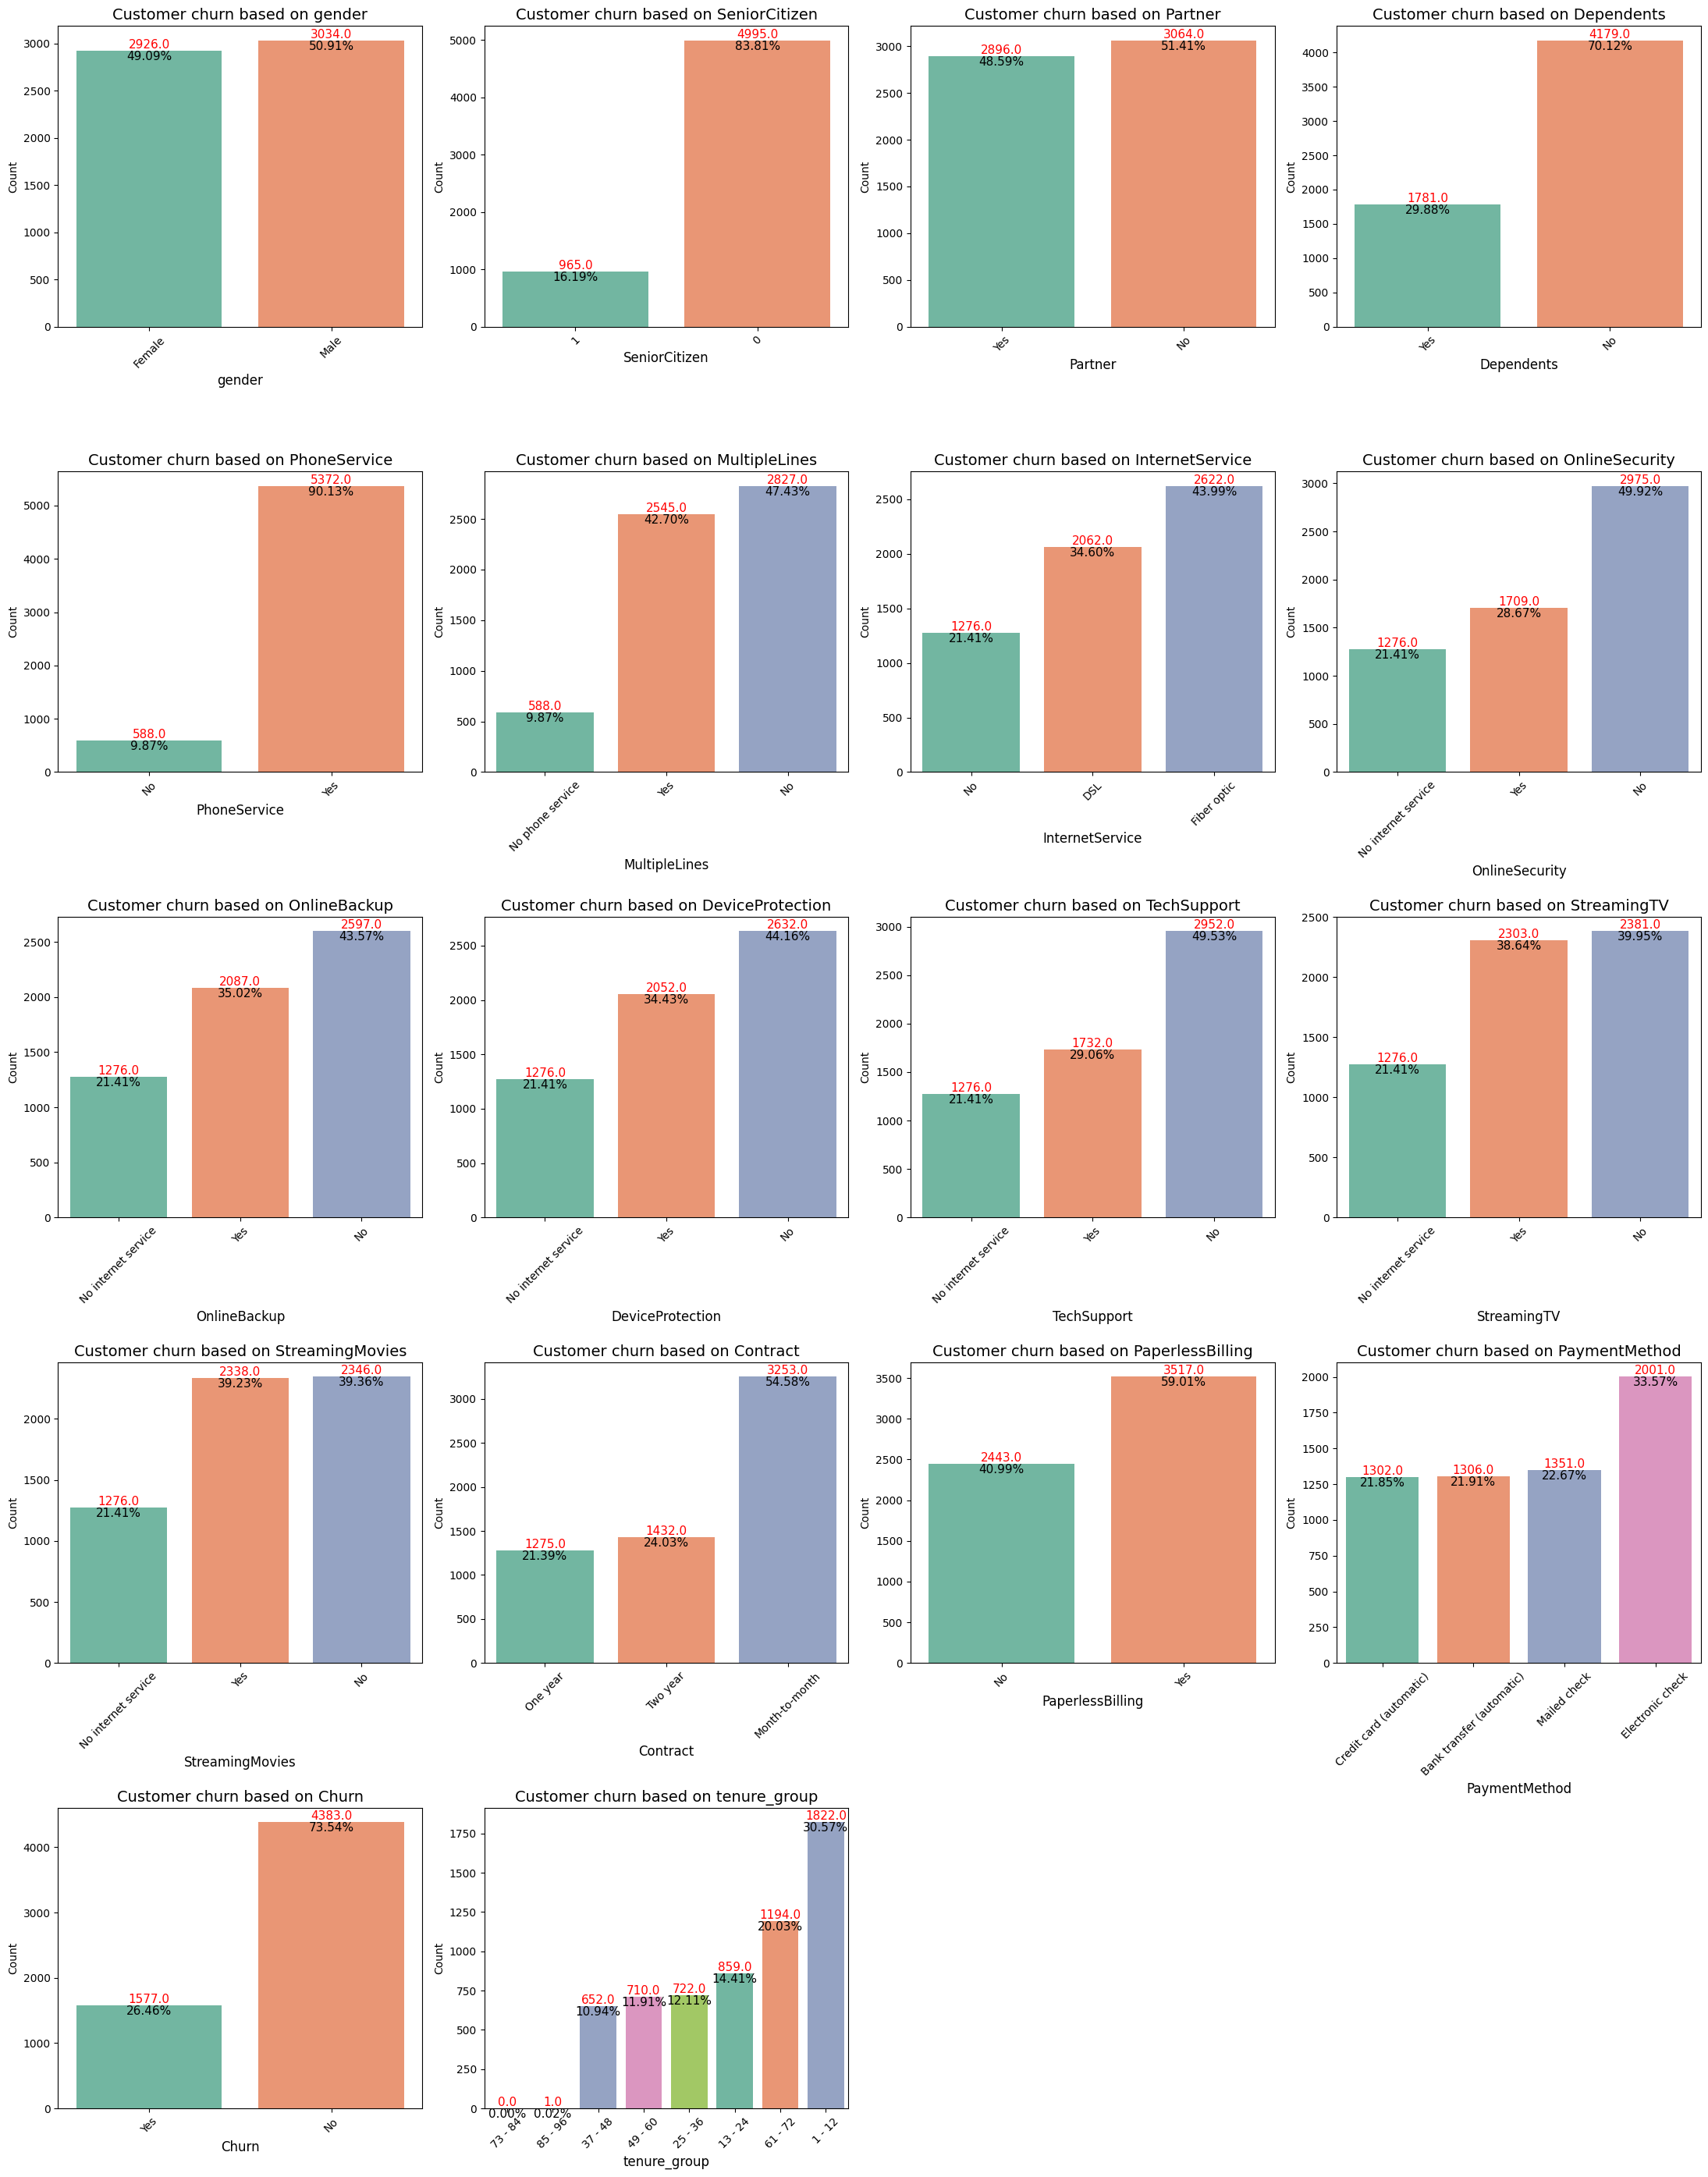

In [30]:
#Distribution of feature plot
color_palette = sns.color_palette("Set2", n_colors=5)
plt.figure(figsize=(22,28))

cont_columns = ['MonthlyCharges','TotalCharges']
cat_columns = [col for col in df.columns if col not in cont_columns]

for i, column in enumerate(cat_columns, start =1):
  ax = plt.subplot(5,4,i)
  order = df[column].value_counts().index[::-1]
  sns.countplot(data = df, x = column, order = order ,palette=color_palette)
  plt.xticks(rotation=45)
  plt.xlabel(column, fontsize = 12)
  plt.ylabel('Count')
  plt.title(f'Customer churn based on {column}',fontsize = 14)
  total = len(df)
  for p in ax.patches:
    height = p.get_height()
    percentage_label = (height/total)*100
    ax.annotate(f'{percentage_label:.2f}%',(p.get_x()+p.get_width()/2.,height), ha ='center', va= 'top', fontsize=11,color='black')
    ax.annotate(height,(p.get_x()+p.get_width()/2.,height), ha ='center', va= 'bottom', fontsize=11,color='red')
plt.tight_layout()
plt.show()

<ipython-input-31-efa48da7e83e>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = column,palette=color_palette)
<ipython-input-31-efa48da7e83e>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = column,palette=color_palette)


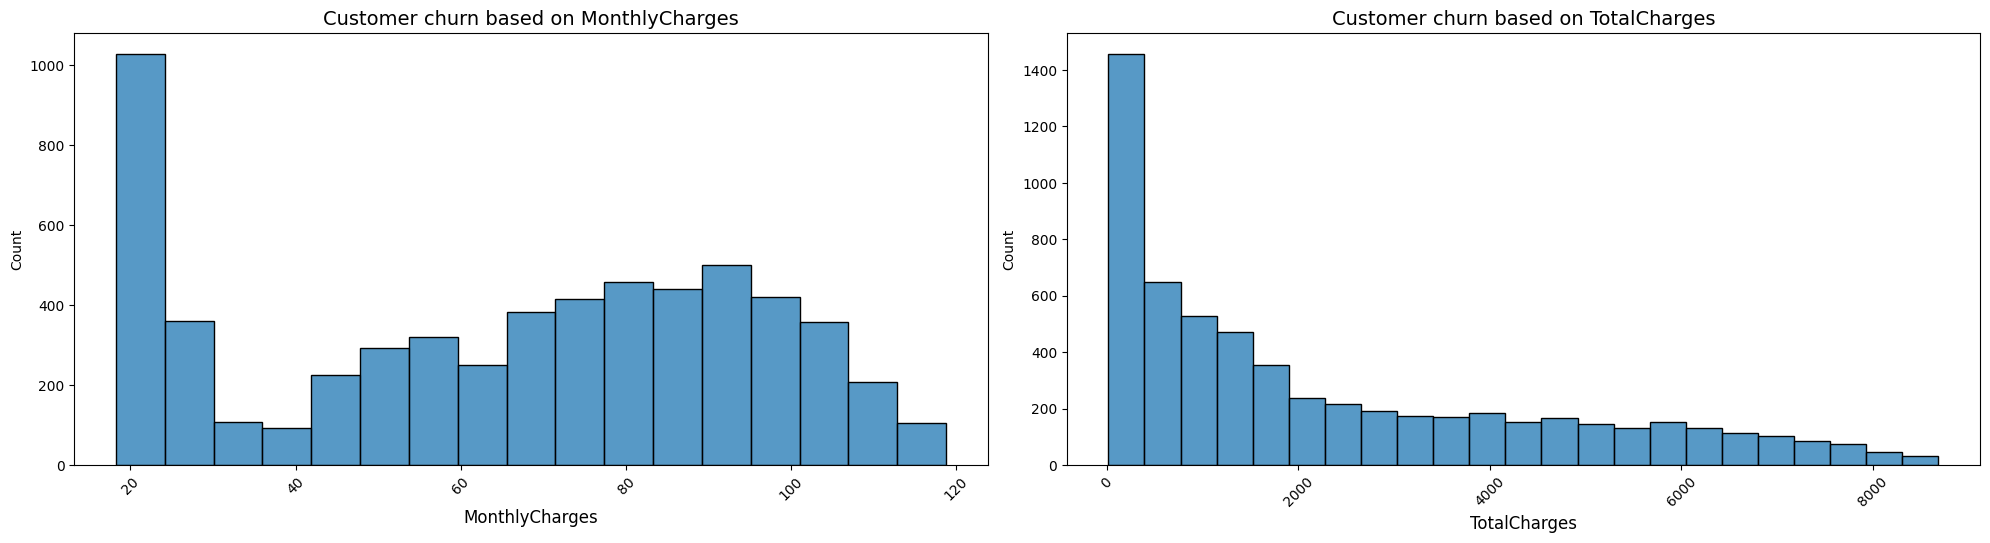

In [31]:
#Distribution of feature plot
color_palette = sns.color_palette("Set2", n_colors=5)
plt.figure(figsize=(20,10))

cont_columns = ['MonthlyCharges','TotalCharges']


for i, column in enumerate(cont_columns, start =1):
  ax = plt.subplot(2,2,i)
  order = df[column].value_counts().index[::-1]
  sns.histplot(data = df, x = column,palette=color_palette)
  plt.xticks(rotation=45)
  plt.xlabel(column, fontsize = 12)
  plt.ylabel('Count')
  plt.title(f'Customer churn based on {column}',fontsize = 14)

plt.tight_layout()
plt.show()

```
=== Insights ===
1) Gender column is almost equally distributed     
2) 83% of the customer are not a SeniorCitizen    
3) Almost 50% of the customer is having partner and 50% not having partner    
4) 70% of the customers is not a dependent customer      
5) 90% of the customers are using phone service
6) 47% of the customers are not using the multipleline service and 42.7% of customer using the multipleline service
7) 44% of the customer is using fiber optic service and 35% of customer using DSL sevice and 21% of customers are not using interner service
8) 22% of the customer who is not taken the internet service will not get OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,
StreamingTV,StreamingMovies this type of services
9) 54% of the customers are taking month to month contract and remaining 56% customers are taking longer time contract period
10) 59% of customers are doing paperless billing
11) 33.5% of customer is making payment using electronic check and remaining 66.5% of the customers are almost equally paying the bill
by bank transfer, credit card, mailed check
12) 26.4% of the customer are churn customers.As we can see only 26.4% belongs to one group it is imbalanced data we need balance the data

```

In [32]:
df[df['OnlineSecurity']== 'No']['TechSupport'].value_counts()

No     2169
Yes     806
Name: TechSupport, dtype: int64

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [34]:
df['PaymentMethod'].value_counts()

Electronic check             2001
Mailed check                 1351
Bank transfer (automatic)    1306
Credit card (automatic)      1302
Name: PaymentMethod, dtype: int64

In [35]:
df['Churn'].value_counts()

No     4383
Yes    1577
Name: Churn, dtype: int64

In [36]:
#encoding chrun column
df['Churn'] = df['Churn'].map({'No':0,'Yes':1})

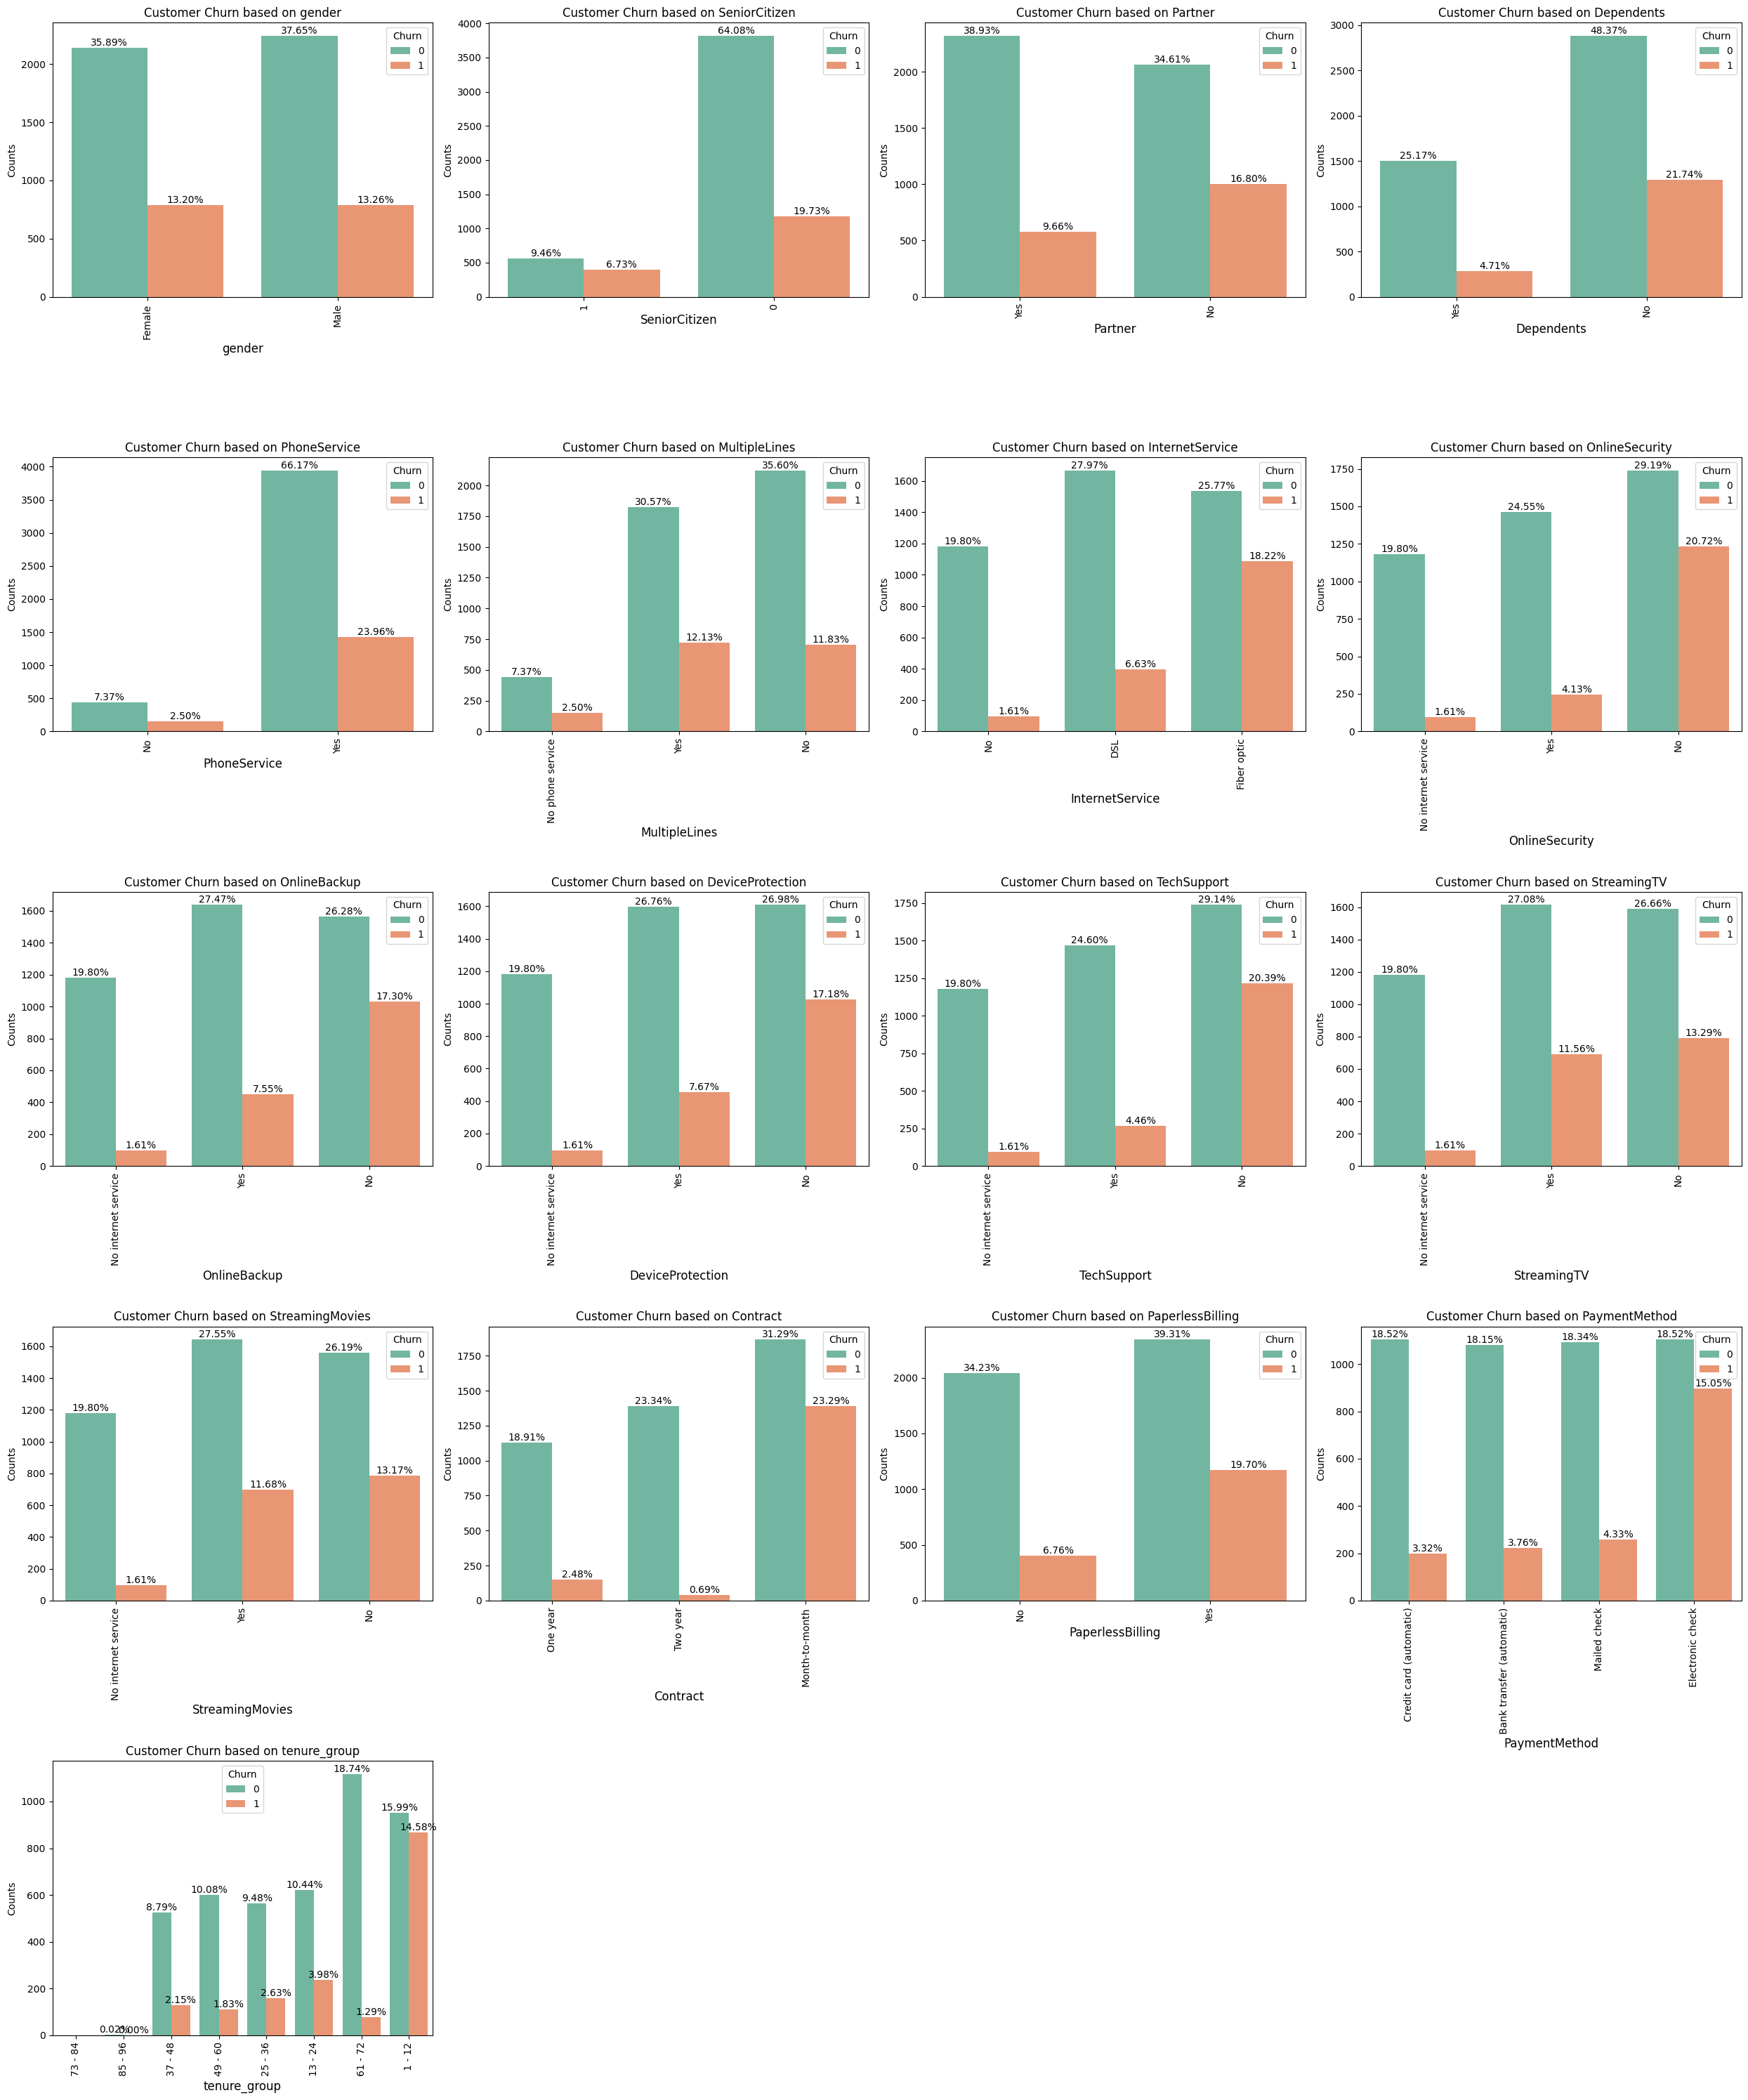

In [37]:
# Feature vs target plot
color = sns.color_palette("Set2", n_colors = 6)
plt.figure(figsize=(25,30))


except_columns = ['MonthlyCharges','TotalCharges','Churn']
cat_columns = [col for col in df.columns if col not in except_columns]

for i, columns in enumerate(cat_columns, start=1):
  ax = plt.subplot(5,4,i)
  order = df[columns].value_counts().index[::-1]
  sns.countplot(data =df, x = columns, hue='Churn', order = order , palette = color)
  plt.xticks(rotation = 90)
  plt.xlabel(columns,fontsize = 12)
  plt.ylabel('Counts')
  plt.title(f'Customer Churn based on {columns}')
  total = len(df)
  for p in ax.patches:
    height = p.get_height()
    percentage_label = (height/total)*100
    ax.annotate(f'{percentage_label:.2f}%',(p.get_x()+p.get_width()/2.,height), ha ='center', va= 'bottom', fontsize=10,color='black')
plt.tight_layout()
plt.show()

#  # Calculate percentages for each category in the current column
#   counts = df.groupby([column, 'Churn']).size().unstack().T
#   counts['Total'] = counts.sum(axis=1)
#   for p in ax.patches:
#       height = p.get_height()
#       category = order[int(p.get_x())] if order is not None else p.get_x()
#       churn_percentage = f'{(counts["Churn"][category] / counts["Total"][category]) * 100:.2f}%' if p.get_height() > 0 else ""
#       ax.annotate(churn_percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')


<ipython-input-38-51f595878b53>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data = df, x = column,hue ='Churn',palette=color_palette,bins =10)
<ipython-input-38-51f595878b53>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data = df, x = column,hue ='Churn',palette=color_palette,bins =10)


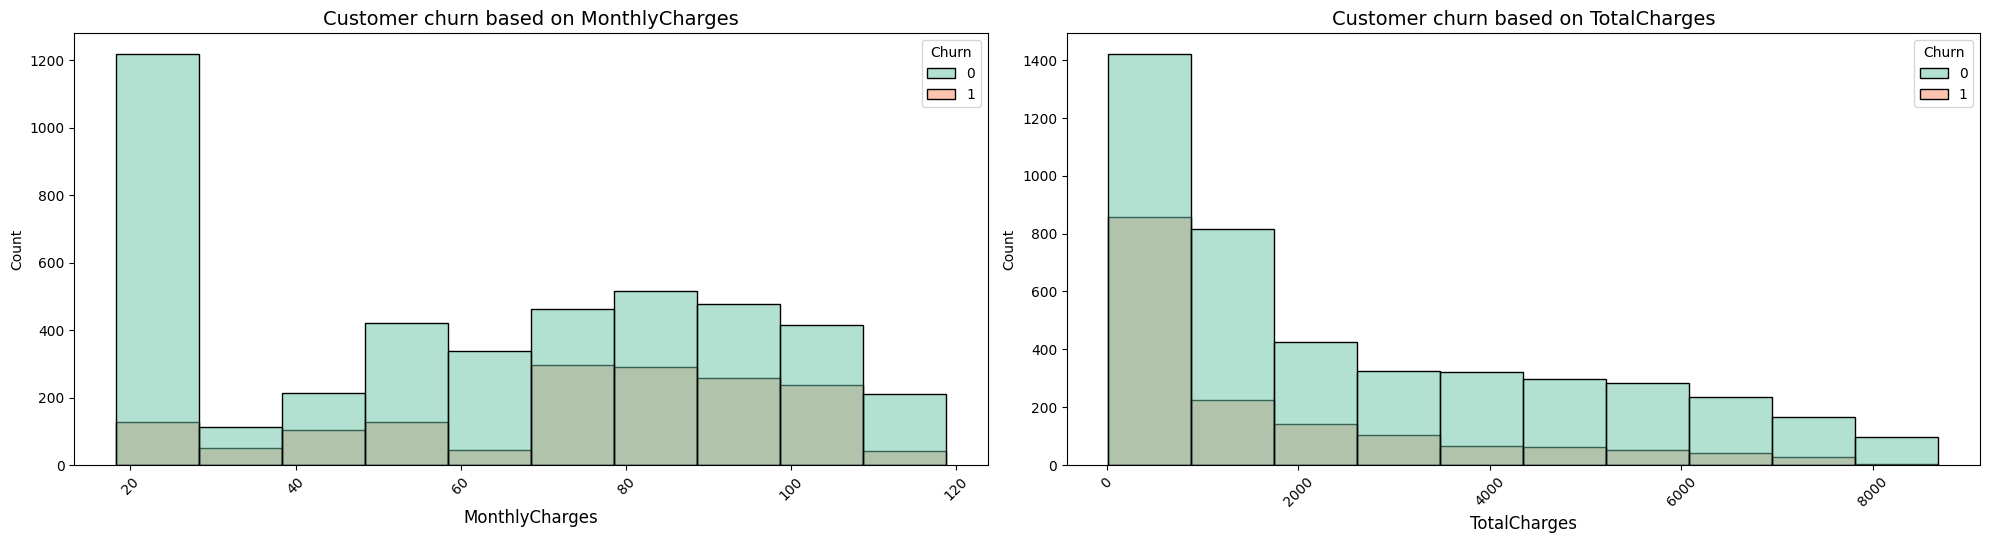

In [38]:
# Feature vs target plot for continuous data
color_palette = sns.color_palette("Set2", n_colors=5)
plt.figure(figsize=(20,10))

cont_columns = ['MonthlyCharges','TotalCharges']


for i, column in enumerate(cont_columns, start =1):
  ax = plt.subplot(2,2,i)
  order = df[column].value_counts().index[::-1]
  sns.histplot(data = df, x = column,hue ='Churn',palette=color_palette,bins =10)
  plt.xticks(rotation=45)
  plt.xlabel(column, fontsize = 12)
  plt.ylabel('Count')
  plt.title(f'Customer churn based on {column}',fontsize = 14)

plt.tight_layout()
plt.show()

```
=== Insights ===
1) Gender column does not make much impact because they churning equally.
2) As we can see in SeniorCitizen plot majority of the people churn is senior citizen custmors.
3) People who is not having the partner is churn more
4) we can see Dependent plot the customer who is not dependent is churn more
5) The people who uses the fiber optic service having more chances of churn
6) Customer who is taken the month to month contract are churn most
7) Customers who is using electronic check payment method are churn most
8) most of the Customers churn within one year
9) As we can see in monthly charges graph customer who pay 70-110 are churning more
10) Customer who pay total charge between 0-1000 are churn more
```

### 2 Bivariate Analysis

In [39]:
df_churn = df[df['Churn']== 1]
df_NotChurn = df[df['Churn']== 0]

In [40]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

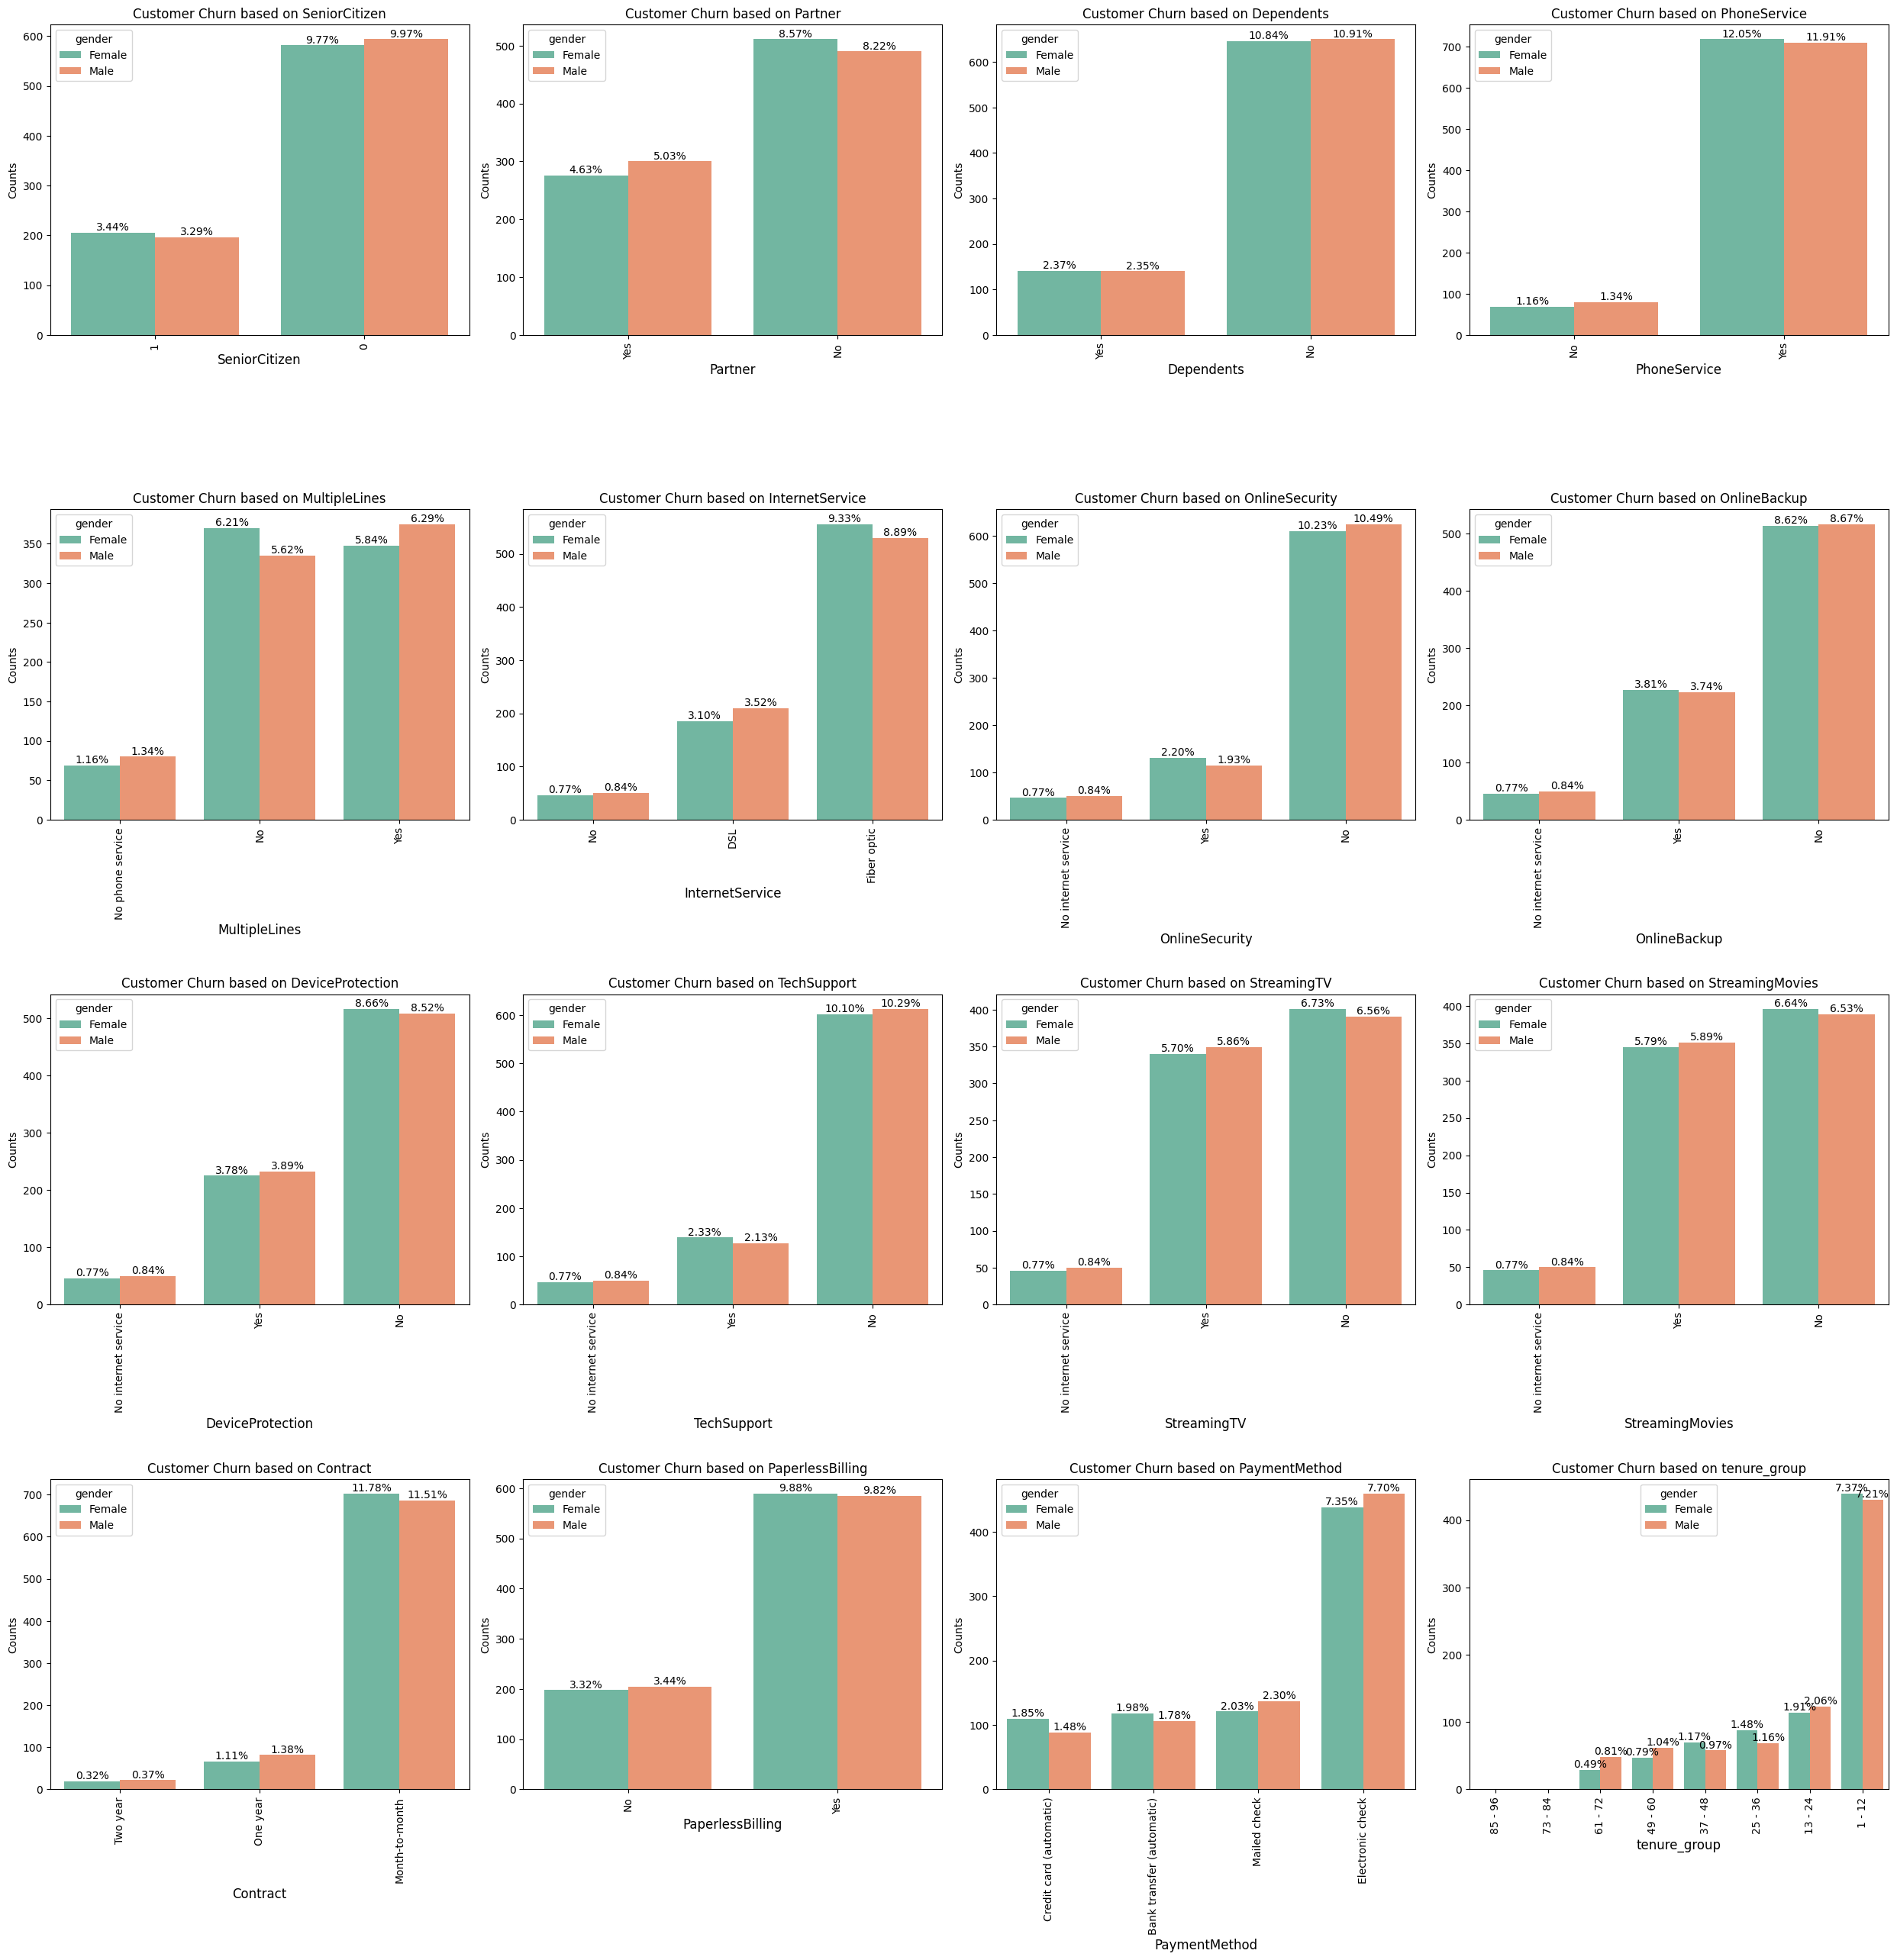

In [41]:
color = sns.color_palette("Set2", n_colors = 6)
plt.figure(figsize=(25,30))


except_columns = ['MonthlyCharges','TotalCharges','Churn','gender']
cat_columns = [col for col in df_churn.columns if col not in except_columns]

for i, columns in enumerate(cat_columns, start=1):
  ax = plt.subplot(5,4,i)
  order = df_churn[columns].value_counts().index[::-1]
  sns.countplot(data =df_churn, x = columns, hue='gender', order = order , palette = color)
  plt.xticks(rotation = 90)
  plt.xlabel(columns,fontsize = 12)
  plt.ylabel('Counts')
  plt.title(f'Customer Churn based on {columns}')
  total = len(df)
  for p in ax.patches:
    height = p.get_height()
    percentage_label = (height/total)*100
    ax.annotate(f'{percentage_label:.2f}%',(p.get_x()+p.get_width()/2.,height), ha ='center', va= 'bottom', fontsize=10,color='black')
plt.tight_layout()
plt.show()

<ipython-input-42-665123172af2>:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data = df_churn, x = column,hue =columns,palette=color_palette,bins =10)
<ipython-input-42-665123172af2>:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data = df_churn, x = column,hue =columns,palette=color_palette,bins =10)
<ipython-input-42-665123172af2>:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data = df_churn, x = column,hue =columns,palette=color_palette,bins =10)
<ipython-input-42-665123172af2>:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data = df_churn, x = column,hue =columns,palette=color_palette,bins =10)
<ipython-input-42-665123172af2>:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended

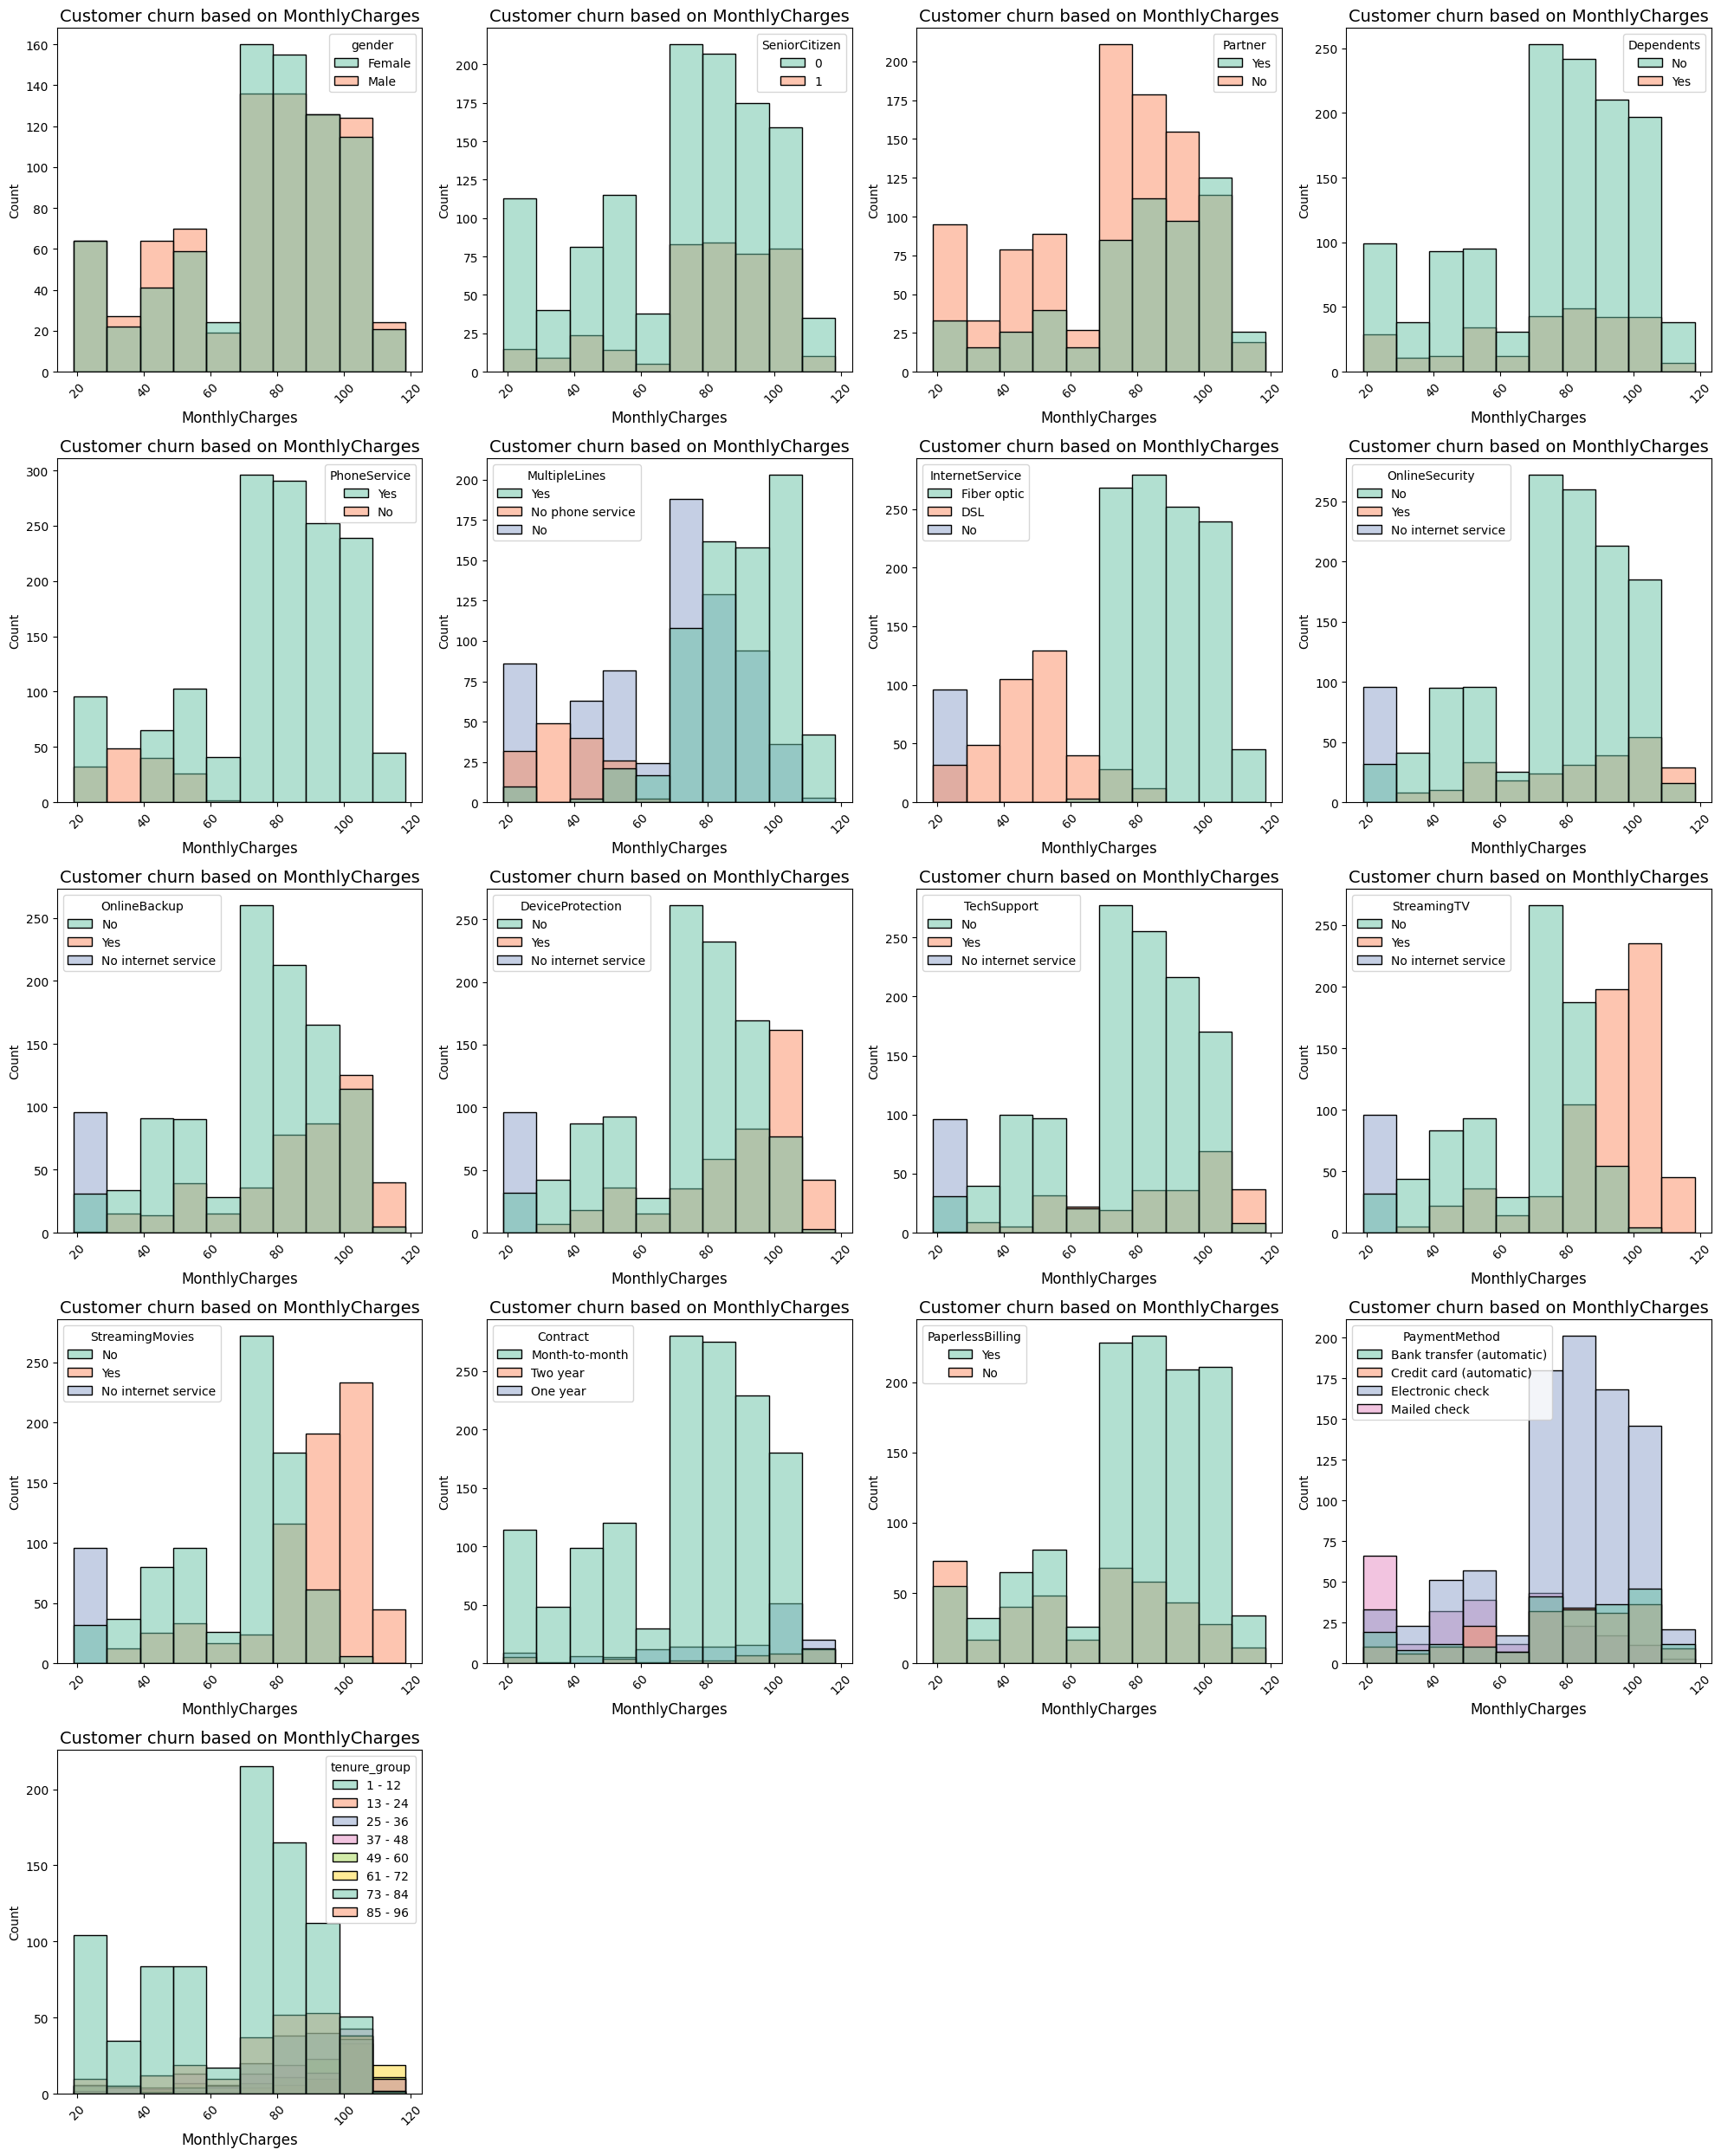

In [42]:
color_palette = sns.color_palette("Set2", n_colors=6)
plt.figure(figsize=(20,25))

column = 'MonthlyCharges'
except_columns = ['MonthlyCharges','TotalCharges','Churn']
hue_column = [col for col in df_churn.columns if col not in except_columns]

for i, columns in enumerate(hue_column, start =1):
  ax = plt.subplot(5,4,i)
  order = df_churn[columns].value_counts().index[::-1]
  sns.histplot(data = df_churn, x = column,hue =columns,palette=color_palette,bins =10)
  plt.xticks(rotation=45)
  plt.xlabel(column, fontsize = 12)
  plt.ylabel('Count')
  plt.title(f'Customer churn based on {column}',fontsize = 14)

plt.tight_layout()
plt.show()

```
=== Insights ===
As we checked gender column was equally spread for each column so there is no use of it
```

In [43]:
df.drop(['gender'], axis = 1, inplace = True)

## 3 Encoding

In [45]:
df.nunique()

SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1525
TotalCharges        5610
Churn                  2
tenure_group           7
dtype: int64

### 1 Label Encoding

In [46]:
# Doing label encoding

df['Partner'] = df['Partner'].map({'Yes':1, 'No':0})
df['Dependents'] =df['Dependents'].map({'Yes':1,'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1,'No':0})
df['MultipleLines'] =df['MultipleLines'].map({'No phone service':2,'Yes':1,'No':0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service':2,'Yes':1,'No':0})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service':2,'Yes':1,'No':0})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service':2,'Yes':1,'No':0})
df['TechSupport'] = df['TechSupport'].map({'No internet service':2,'Yes':1,'No':0})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service':2,'Yes':1,'No':0})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service':2,'Yes':1,'No':0})
df['Contract'] = df['Contract'].map({'Two year':2,'One year':1,'Month-to-month':0})
df['PaperlessBilling'] =df['PaperlessBilling'].map({'Yes':1,'No':0})

In [47]:
df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,1,1,1,1,No,2,2,2,2,2,2,2,0,Credit card (automatic),24.10,1734.65,0,85 - 96
1,0,0,0,1,0,Fiber optic,0,1,1,0,1,0,0,1,Credit card (automatic),88.15,3973.20,0,37 - 48
2,1,1,0,1,1,Fiber optic,0,0,0,0,0,0,0,1,Bank transfer (automatic),74.95,2869.85,1,37 - 48
3,0,0,0,1,0,DSL,0,0,0,0,0,1,0,1,Electronic check,55.90,238.50,0,1 - 12
4,0,0,0,1,0,DSL,1,0,1,0,0,0,0,0,Electronic check,53.45,119.50,0,1 - 12


### 2 One Hot Encoding

In [48]:
# one-hot Encoding
df1 = pd.get_dummies(df)
df1.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,tenure_group_73 - 84,tenure_group_85 - 96
0,0,1,1,1,1,2,2,2,2,2,2,2,0,24.10,1734.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,1,0,1,0,0,1,88.15,3973.20,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,0,0,1,74.95,2869.85,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,1,55.90,238.50,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,1,0,0,0,0,0,53.45,119.50,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [50]:
# df1['tenure_group_73 - 84'].value_counts()

In [51]:
#Dropping tenure_group_73 - 84 column
# df1.drop(['tenure_group_73 - 84'],axis= 1, inplace = True)

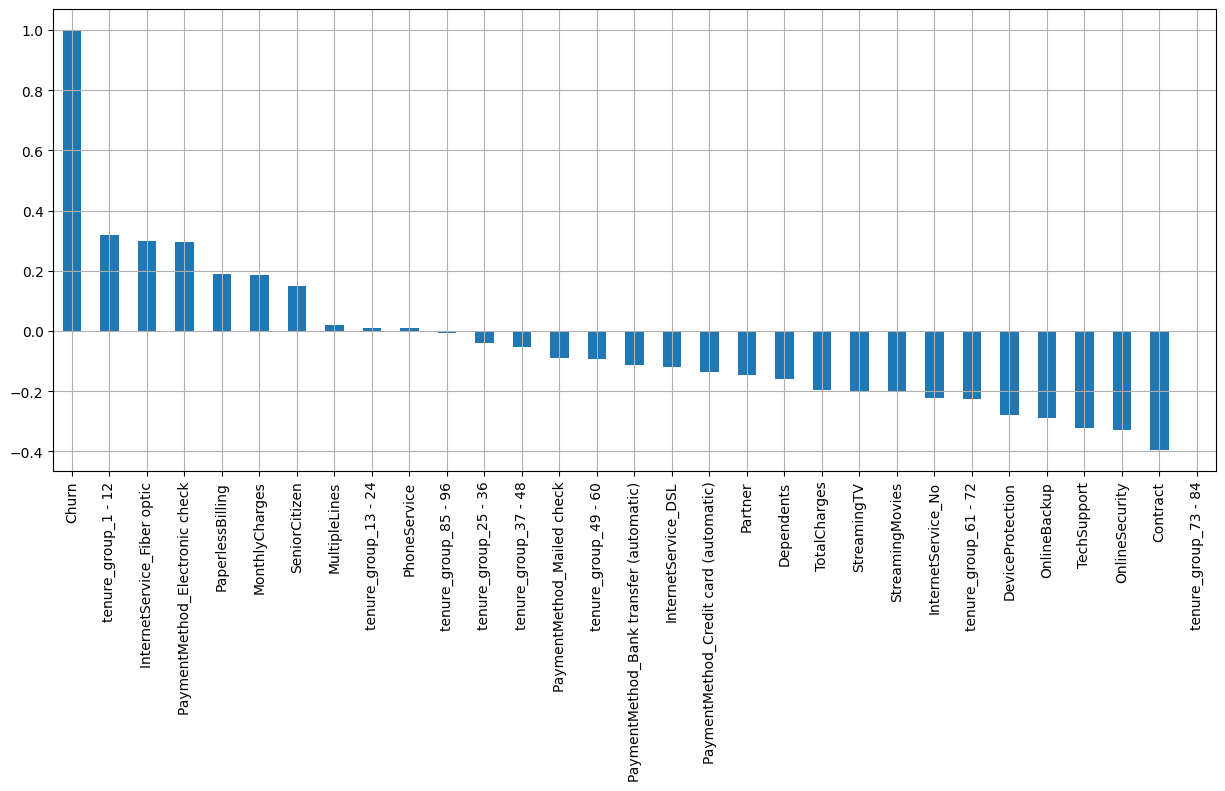

In [52]:
plt.figure(figsize =(15,6))
df1.corr()['Churn'].sort_values(ascending=False).plot(kind ="bar")
plt.grid(True)
plt.show()

<Axes: >

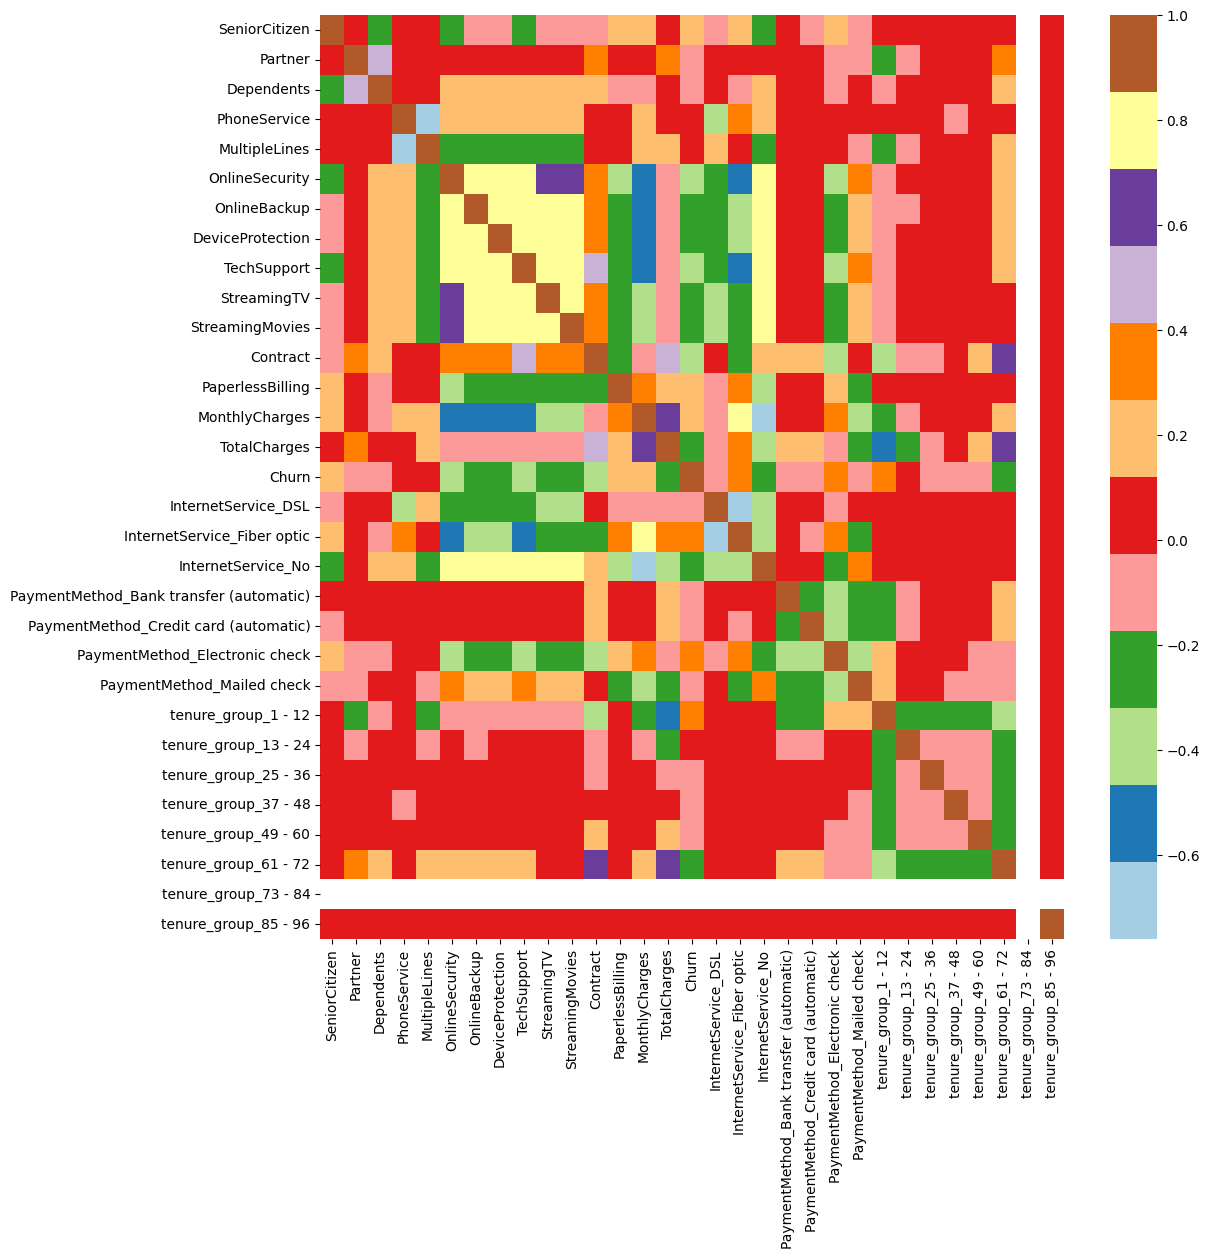

In [53]:
plt.figure(figsize =(12,12))
sns.heatmap(df1.corr(), cmap= "Paired")

In [54]:
df1.corr()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,tenure_group_73 - 84,tenure_group_85 - 96
SeniorCitizen,1.000000,0.014673,-0.214301,0.009477,0.091159,-0.211365,-0.155801,-0.156750,-0.225256,-0.132914,-0.124138,-0.149486,0.155174,0.218446,0.092621,0.150406,-0.108070,0.255520,-0.183884,-0.013718,-0.029554,0.169763,-0.148762,-0.017801,0.002486,0.030849,-0.008124,0.015526,-0.012886,NaN,-0.005694
Partner,0.014673,1.000000,0.447808,0.026695,0.087325,0.089757,0.094806,0.095850,0.074580,0.085541,0.080504,0.298409,-0.017700,0.103261,0.321213,-0.144804,-0.009131,0.006056,0.003260,0.098528,0.096154,-0.086937,-0.094180,-0.305548,-0.043388,-0.001877,0.037846,0.095348,0.284186,NaN,0.013325
Dependents,-0.214301,0.447808,1.000000,0.000872,-0.018367,0.195823,0.164935,0.156691,0.186446,0.142178,0.130336,0.242294,-0.111772,-0.115669,0.063842,-0.158087,0.050720,-0.167273,0.143601,0.040526,0.078002,-0.156749,0.059784,-0.145966,0.000322,0.004772,0.024856,0.025837,0.122902,NaN,0.019843
PhoneService,0.009477,0.026695,0.000872,1.000000,-0.692572,0.128374,0.152940,0.139170,0.128027,0.172985,0.167205,0.006993,0.021713,0.253044,0.117932,0.008397,-0.454880,0.293220,0.172678,0.012034,-0.013001,0.005259,-0.004990,-0.007628,0.012411,0.002123,-0.028256,-0.010340,0.026424,NaN,0.004286
MultipleLines,0.091159,0.087325,-0.018367,-0.692572,1.000000,-0.234857,-0.208940,-0.198900,-0.233997,-0.205016,-0.195532,0.076354,0.107583,0.142511,0.250022,0.021088,0.257439,0.012864,-0.314109,0.045444,0.055070,0.057156,-0.163716,-0.194259,-0.047469,-0.000599,0.046574,0.073084,0.170032,NaN,0.007405
OnlineSecurity,-0.211365,0.089757,0.195823,0.128374,-0.234857,1.000000,0.749519,0.749960,0.788804,0.703555,0.706381,0.390236,-0.329328,-0.612197,-0.149929,-0.329872,-0.213943,-0.492182,0.843698,0.040970,0.069547,-0.347515,0.282861,-0.115265,-0.004283,-0.015641,0.015460,0.017850,0.122004,NaN,0.020940
OnlineBackup,-0.155801,0.094806,0.164935,0.152940,-0.208940,0.749519,1.000000,0.738878,0.749177,0.717401,0.715942,0.352018,-0.263432,-0.530718,-0.085737,-0.287323,-0.305356,-0.387212,0.822679,0.041589,0.060031,-0.294523,0.231870,-0.133057,-0.026879,-0.013251,0.021162,0.032323,0.144218,NaN,0.020419
DeviceProtection,-0.156750,0.095850,0.156691,0.139170,-0.198900,0.749960,0.738878,1.000000,0.766519,0.759876,0.767732,0.394215,-0.274730,-0.508187,-0.077334,-0.278593,-0.311296,-0.382956,0.824417,0.042348,0.078496,-0.302533,0.221932,-0.139402,-0.024935,-0.009749,0.038279,0.023019,0.141141,NaN,0.020462
TechSupport,-0.225256,0.074580,0.186446,0.128027,-0.233997,0.788804,0.749177,0.766519,1.000000,0.737051,0.736606,0.421739,-0.311104,-0.590433,-0.138157,-0.323643,-0.217318,-0.487777,0.842280,0.045602,0.072184,-0.351879,0.280605,-0.111304,-0.012902,-0.009047,0.011068,0.010867,0.128709,NaN,0.020905
StreamingTV,-0.132914,0.085541,0.142178,0.172985,-0.205016,0.703555,0.717401,0.759876,0.737051,1.000000,0.807794,0.331205,-0.201690,-0.417209,-0.074420,-0.201721,-0.398902,-0.289523,0.812947,0.020325,0.029556,-0.209613,0.187181,-0.111592,-0.009252,-0.010229,0.020400,0.035822,0.099350,NaN,0.020177


In [55]:
correlation_matrix = df1.corr()

# Set the correlation threshold
correlation_threshold = 0.8

# Find columns with correlations greater than the threshold and their correlation values
highly_correlated_columns = []

for column in correlation_matrix.columns:
    correlated_columns = correlation_matrix.index[
        (correlation_matrix[column] > correlation_threshold) & (correlation_matrix.index != column)
    ]

    if len(correlated_columns) > 0:
        for correlated_column in correlated_columns:
            corr_value = correlation_matrix.loc[column, correlated_column]
            highly_correlated_columns.append((column, correlated_column, corr_value))

print("Columns with correlations above 0.8:")
for column1, column2, corr_value in highly_correlated_columns:
    print(f"{column1} - {column2}: {corr_value:.2f}")

Columns with correlations above 0.8:
OnlineSecurity - InternetService_No: 0.84
OnlineBackup - InternetService_No: 0.82
DeviceProtection - InternetService_No: 0.82
TechSupport - InternetService_No: 0.84
StreamingTV - StreamingMovies: 0.81
StreamingTV - InternetService_No: 0.81
StreamingMovies - StreamingTV: 0.81
StreamingMovies - InternetService_No: 0.81
InternetService_No - OnlineSecurity: 0.84
InternetService_No - OnlineBackup: 0.82
InternetService_No - DeviceProtection: 0.82
InternetService_No - TechSupport: 0.84
InternetService_No - StreamingTV: 0.81
InternetService_No - StreamingMovies: 0.81


## 4 Balancing Data

In [61]:
x = df1.drop(['Churn'],axis =1)
y = df1['Churn']

In [62]:
pd.Series(y).value_counts() / pd.Series(y).shape[0]

0    0.735403
1    0.264597
Name: Churn, dtype: float64

```
As we can see only 26% data belongs to one group so dataset imbalanced we can use sampling technique to balance the data
```

In [66]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt,y_smt = smt.fit_resample(x,y)

In [67]:
pd.Series(y_smt).value_counts() / pd.Series(y_smt).shape[0]


1    0.532387
0    0.467613
Name: Churn, dtype: float64

```
Now dataset is balanced
```

## 5 Split

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_smt,y_smt, test_size=0.2,random_state = 7)

In [69]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3890, 30), (973, 30), (3890,), (973,))

## 6 Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Model

## 1 Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_scaled, y_train)

LogisticRegression()

In [72]:
LR_pred = LR.predict(x_test_scaled)

## 2 KNN

### 1 Find best hyperparameter(K)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for K in [1,2,3,4,5,7,9,11,15,19,24,26,30,35,39,42,46,50]:
  knn = KNeighborsClassifier(K)
  knn.fit(x_train_scaled,y_train)
  print(f"K: {K}, train_score : {knn.score(x_train_scaled,y_train)}, cross val score : {np.mean(cross_val_score(knn,x_train_scaled,y_train,cv=10))}")

K: 1, train_score : 1.0, cross val score : 0.9249357326478149
K: 2, train_score : 0.9704370179948586, cross val score : 0.9228791773778922
K: 3, train_score : 0.9591259640102828, cross val score : 0.9287917737789202
K: 4, train_score : 0.9562982005141388, cross val score : 0.9303341902313624
K: 5, train_score : 0.9493573264781491, cross val score : 0.9275064267352185
K: 7, train_score : 0.9424164524421594, cross val score : 0.9300771208226222
K: 9, train_score : 0.9385604113110539, cross val score : 0.9272493573264782
K: 11, train_score : 0.9362467866323907, cross val score : 0.9249357326478149
K: 15, train_score : 0.9321336760925449, cross val score : 0.920051413881748
K: 19, train_score : 0.926478149100257, cross val score : 0.9197943444730077
K: 24, train_score : 0.9275064267352185, cross val score : 0.9195372750642674
K: 26, train_score : 0.9267352185089974, cross val score : 0.9197943444730077
K: 30, train_score : 0.922879177377892, cross val score : 0.9190231362467867
K: 35, trai

Best hyperparameter = 4

### 2 Implementing the best hyperparameter

In [76]:
knn = KNeighborsClassifier(4)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

In [77]:
knn_pred = knn.predict(x_test_scaled)

## 3 Decision Tree

### 1 Find best hyperparameter(max_depth)

In [78]:
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,7,9,11,13,15,19,24,26,30,35,39,42,46,50]:
  DT = DecisionTreeClassifier(max_depth = depth, random_state =7)
  DT.fit(x_train_scaled,y_train)
  print(f"Depth : {depth} , train score: {DT.score(x_train_scaled,y_train)}, cross val score: {np.mean(cross_val_score(DT,x_train_scaled,y_train,cv=10))}")

Depth : 1 , train score: 0.8524421593830335, cross val score: 0.8524421593830335
Depth : 2 , train score: 0.8868894601542416, cross val score: 0.8868894601542416
Depth : 3 , train score: 0.9, cross val score: 0.8994858611825194
Depth : 4 , train score: 0.9221079691516709, cross val score: 0.9151670951156812
Depth : 5 , train score: 0.9339331619537276, cross val score: 0.9197943444730076
Depth : 7 , train score: 0.9550128534704371, cross val score: 0.9267352185089972
Depth : 9 , train score: 0.9745501285347044, cross val score: 0.9259640102827763
Depth : 11 , train score: 0.990745501285347, cross val score: 0.9285347043701799
Depth : 13 , train score: 0.9958868894601542, cross val score: 0.9262210796915167
Depth : 15 , train score: 0.9987146529562982, cross val score: 0.9275064267352185
Depth : 19 , train score: 1.0, cross val score: 0.9254498714652957
Depth : 24 , train score: 1.0, cross val score: 0.9254498714652957
Depth : 26 , train score: 1.0, cross val score: 0.9254498714652957
De

Best hyperparameter = 11

### 2 Implementing Best Hyperparameter

In [79]:
DT = DecisionTreeClassifier(max_depth=11, random_state= 7)
DT.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=11, random_state=7)

In [80]:
DT_pred = DT.predict(x_test_scaled)

## 4 Voting Classifier

In [81]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators= [('logistic_regression',LR),('k-nn',knn),('decision_tree',DT)])
VC.fit(x_train_scaled, y_train)

VotingClassifier(estimators=[('logistic_regression', LogisticRegression()),
                             ('k-nn', KNeighborsClassifier(n_neighbors=4)),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=11,
                                                     random_state=7))])

In [82]:
VC_pred = VC.predict(x_test_scaled)

## 5 Random Forest

### 1 Find best hyperparameter(max_depth)

In [83]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,5,8,12,15,18,20,25,35,40,50]:
  rf = RandomForestClassifier(max_depth = depth, random_state =7 )
  rf.fit(x_train_scaled,y_train)
  train_score = rf.score(x_train_scaled,y_train)
  cv = np.mean(cross_val_score(rf,x_train_scaled,y_train,cv =10))
  print(f'depth: {depth},train_score:{train_score}, cross_val_score:{cv}')


depth: 1,train_score:0.8876606683804628, cross_val_score:0.8874035989717223
depth: 2,train_score:0.8953727506426735, cross_val_score:0.8951156812339331
depth: 3,train_score:0.9017994858611825, cross_val_score:0.9005141388174808
depth: 5,train_score:0.9244215938303342, cross_val_score:0.9203084832904885
depth: 8,train_score:0.9632390745501286, cross_val_score:0.9411311053984577
depth: 12,train_score:0.9917737789203085, cross_val_score:0.948586118251928
depth: 15,train_score:0.9966580976863754, cross_val_score:0.9493573264781491
depth: 18,train_score:0.9997429305912596, cross_val_score:0.9511568123393316
depth: 20,train_score:1.0, cross_val_score:0.9501285347043702
depth: 25,train_score:1.0, cross_val_score:0.9503856041131105
depth: 35,train_score:1.0, cross_val_score:0.9503856041131105
depth: 40,train_score:1.0, cross_val_score:0.9503856041131105
depth: 50,train_score:1.0, cross_val_score:0.9503856041131105


Best Hyperparameter = 18

### 2 Implementing Best Hyperparameter

In [84]:
RF = RandomForestClassifier(max_depth = 18, random_state = 7)
RF.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=18, random_state=7)

In [85]:
RF_pred = RF.predict(x_test_scaled)

## 6 XG Boost

### 1 Find best learning rate

In [86]:
from xgboost import XGBClassifier
for learn in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
  XG = XGBClassifier(learning_rate = learn, random_state =7)
  XG.fit(x_train_scaled, y_train)
  print(f"learn: {learn}, train score : {XG.score(x_train_scaled,y_train)}, cross val score: {np.mean(cross_val_score(XG, x_train_scaled,y_train,cv= 10))}")

learn: 0.05, train score : 0.9776349614395887, cross val score: 0.9508997429305911
learn: 0.1, train score : 0.989974293059126, cross val score: 0.9529562982005142
learn: 0.15, train score : 0.996401028277635, cross val score: 0.9544987146529562
learn: 0.2, train score : 0.9989717223650385, cross val score: 0.9534704370179948
learn: 0.25, train score : 0.9994858611825193, cross val score: 0.9562982005141387
learn: 0.3, train score : 1.0, cross val score: 0.9550128534704371
learn: 0.35, train score : 1.0, cross val score: 0.9560411311053985
learn: 0.4, train score : 1.0, cross val score: 0.954241645244216
learn: 0.45, train score : 1.0, cross val score: 0.9547557840616966
learn: 0.5, train score : 1.0, cross val score: 0.9573264781491002
learn: 0.55, train score : 1.0, cross val score: 0.954241645244216
learn: 0.6, train score : 1.0, cross val score: 0.9550128534704371
learn: 0.65, train score : 1.0, cross val score: 0.9552699228791773
learn: 0.7, train score : 1.0, cross val score: 0.9

Best Learning rate = 0.5

### 2 Implementing best Learning Rate

In [87]:
XG = XGBClassifier(learning_rate = 0.5,random_state = 7)
XG.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [88]:
XG_pred = XG.predict(x_test_scaled)

# Evaluation

In [89]:
from sklearn.metrics import accuracy_score, f1_score
print(f'Logistic Regression Accuracy score: {accuracy_score(LR_pred,y_test)} & F1 score : {f1_score(LR_pred,y_test)}')
print(f'KNN Accuracy score: {accuracy_score(knn_pred,y_test)} & F1 score : {f1_score(knn_pred,y_test)}')
print(f'Decision Tree Accuracy score: {accuracy_score(DT_pred,y_test)} & F1 score : {f1_score(DT_pred,y_test)}')
print(f'Voting Classifier Accuracy score: {accuracy_score(VC_pred,y_test)} & F1 score : {f1_score(VC_pred,y_test)}')
print(f'Random Forest Accuracy score: {accuracy_score(RF_pred,y_test)} & F1 score : {f1_score(RF_pred,y_test)}')
print(f'XG Boost Accuracy score: {accuracy_score(XG_pred,y_test)} & F1 score : {f1_score(XG_pred,y_test)}')

Logistic Regression Accuracy score: 0.94655704008222 & F1 score : 0.9525547445255476
KNN Accuracy score: 0.9311408016443987 & F1 score : 0.93836246550138
Decision Tree Accuracy score: 0.9321685508735869 & F1 score : 0.9404332129963898
Voting Classifier Accuracy score: 0.9445015416238438 & F1 score : 0.9505494505494506
Random Forest Accuracy score: 0.9496402877697842 & F1 score : 0.9554140127388535
XG Boost Accuracy score: 0.9547790339157246 & F1 score : 0.9596330275229358


XG Boost is giving best f1 score

# Feature Importance

In [90]:
XG.feature_importances_

array([0.00471598, 0.0058205 , 0.01073535, 0.00542768, 0.00368522,
       0.09409302, 0.00973307, 0.00383867, 0.05362627, 0.0059121 ,
       0.00565716, 0.3921718 , 0.00528189, 0.00983774, 0.00985732,
       0.1020669 , 0.00397132, 0.        , 0.01875626, 0.012145  ,
       0.01356963, 0.01225218, 0.14647552, 0.00656462, 0.00735371,
       0.00567053, 0.01047133, 0.04030923, 0.        , 0.        ],
      dtype=float32)

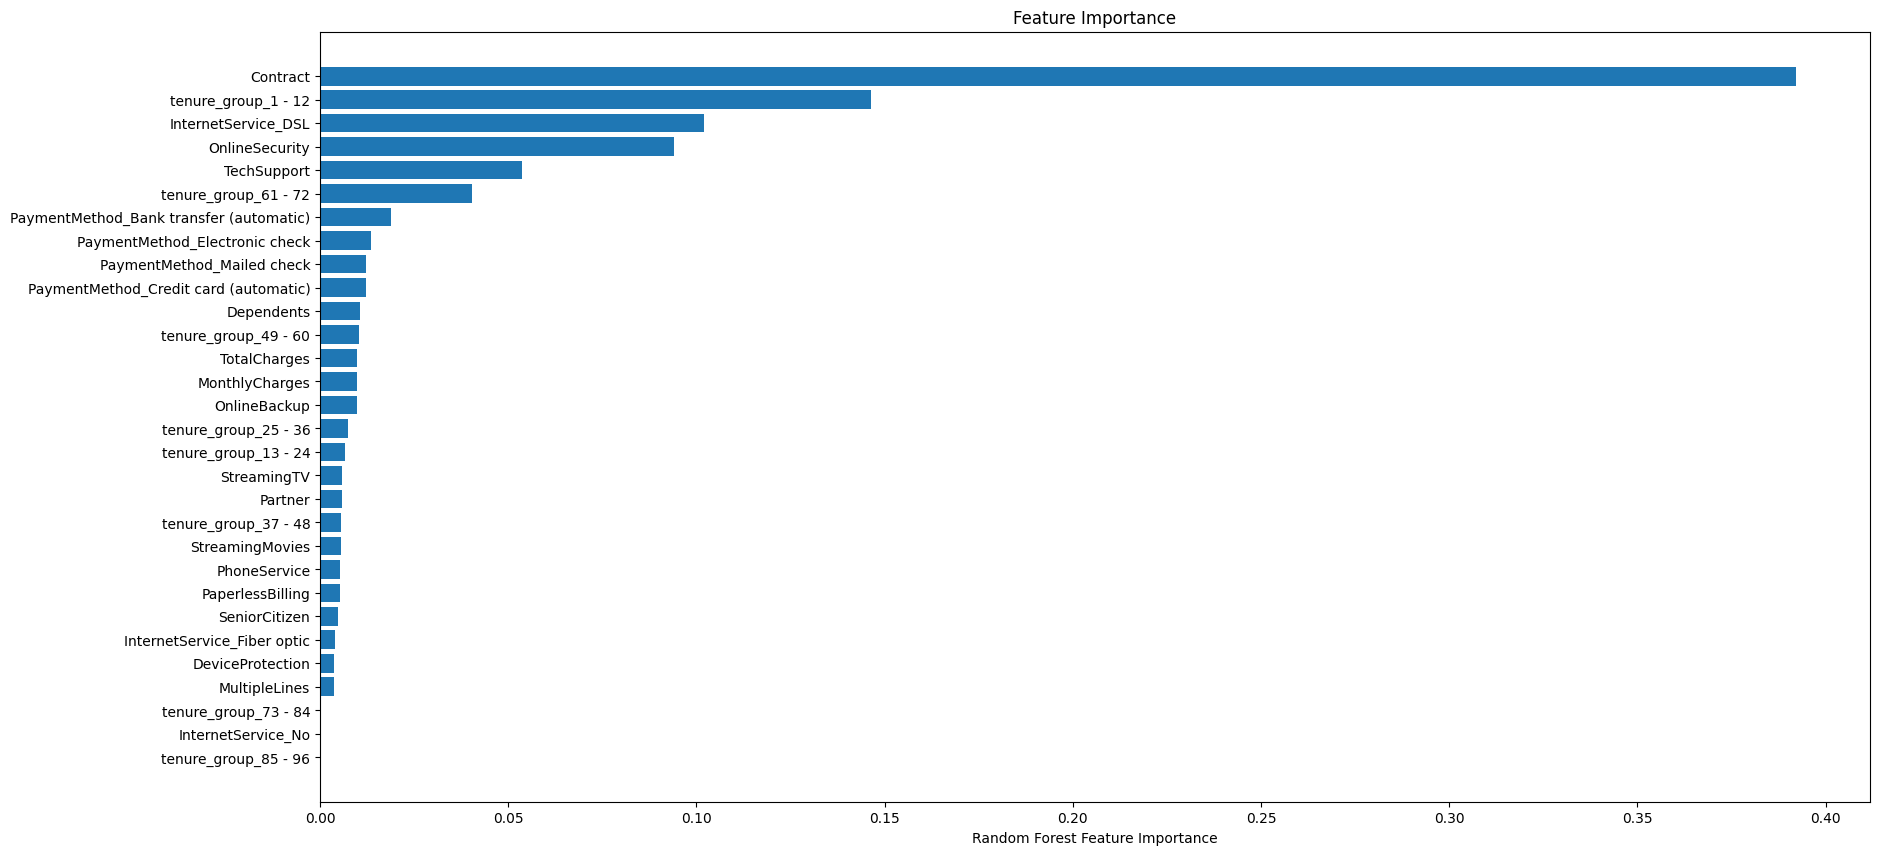

In [91]:
sorted_idx = XG.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(x.columns[sorted_idx], XG.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [92]:
import pickle

In [93]:
filename = 'telecom_model.sav'

In [94]:
pickle.dump(XG,open(filename,'wb'))

In [95]:
load_model = pickle.load(open('telecom_model.sav', 'rb'))

In [96]:
new_pred = load_model.predict(x_test_scaled)

In [97]:
f1_score(new_pred,y_test)

0.9596330275229358